In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns
from datetime import datetime, timedelta
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy.stats import spearmanr
import os

In [2]:
df_transactions = pd.read_csv("C:/Users/felix.oechslein/Desktop/Analysen Thalia, Mai/Rohdaten/"
                                    "transactions_ohne_vorname.csv")

In [3]:
df_transactions.head(20)

,mandator,id,iid,attrtype,key,itemkey,status,productid,productname,modifiedprovider,createdprovider,startdate,quantity,discountname,saleschannelname,price,discountgroup,discountamount,pricetotal
0,100000490,262615460,100279806,OR,JET_1_a1179092,NaN,Order,NaN,NaN,20220701153023,20220630111759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100000490,262615461,100279806,TI,JET_1_a1179092,JET_1_a1179092_1_1_0,Order,JET_1_3941,Maria Stuart und Elisabeth,20220701153023,20220630111759,2.022063e+13,1.0,NaN,Kasse,20.5,NaN,NaN,20.5
2,100000490,262617949,101270948,OR,JET_1_a1179145,NaN,Order,NaN,NaN,20220701153507,20220630135500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100000490,262616022,262428540,OR,JET_1_a1179095,NaN,Order,NaN,NaN,20220701153131,20220630113800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100000490,262616023,262428540,TI,JET_1_a1179095,JET_1_a1179095_1_1_0,Order,JET_1_3618,book.beat,20220701153131,20220630113800,2.022063e+13,1.0,NaN,Gateway,5.0,NaN,NaN,5.0
5,100000490,262616130,262429050,TI,JET_1_a1179096,JET_1_a1179096_1_1_0,Order,JET_1_3941,Maria Stuart und Elisabeth,20220701153146,20220630115500,2.022063e+13,1.0,NaN,Gateway,20.5,NaN,NaN,20.5
6,100000490,262616129,262429050,OR,JET_1_a1179096,NaN,Order,NaN,NaN,20220701153146,20220630115500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100000490,262616274,262429050,TI,JET_1_a1179096,JET_1_a1179096_1_2_0,Order,JET_1_3941,Maria Stuart und Elisabeth,20220701153146,20220630115500,2.022063e+13,1.0,9 € Sonderpreis,Gateway,20.5,Ermäßigungen Fixpreis,NaN,9.0
8,100000490,262616393,262429655,OR,JET_1_a1179100,NaN,Order,NaN,NaN,20220701153217,20220630121500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100000490,262615889,100353981,RV,JET_1_r411626,NaN,cancelled,NaN,NaN,20220707061930,20220630113314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Transactions Bereinigung

In [4]:
df_t_bereinigt = df_transactions[["iid", "key", "attrtype", "status", "pricetotal", "createdprovider"]]
df_t_bereinigt["pricetotal"] = pd.to_numeric(df_t_bereinigt["pricetotal"], errors = "coerce")
df_t_bereinigt = df_t_bereinigt.query('attrtype == "TI"')
df_t_bereinigt = df_t_bereinigt.query('status == "Buchung" or status == "Order"')
df_t_bereinigt = df_t_bereinigt.query('pricetotal >= 0.01')
searchfor = ['TEST']
#searchfor = ['TEST', 'JET', "WS"]
df_t_bereinigt = df_t_bereinigt[~df_t_bereinigt["key"].str.contains('|'.join(searchfor))]
df_t_bereinigt.head(20)

C:\Users\felix.oechslein\AppData\Local\Temp\ipykernel_7548\1557075601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t_bereinigt["pricetotal"] = pd.to_numeric(df_t_bereinigt["pricetotal"], errors = "coerce")


,iid,key,attrtype,status,pricetotal,createdprovider
1,100279806,JET_1_a1179092,TI,Order,20.5,20220630111759
4,262428540,JET_1_a1179095,TI,Order,5.0,20220630113800
5,262429050,JET_1_a1179096,TI,Order,20.5,20220630115500
7,262429050,JET_1_a1179096,TI,Order,9.0,20220630115500
10,262429655,JET_1_a1179100,TI,Order,55.0,20220630121500
11,262429655,JET_1_a1179100,TI,Order,55.0,20220630121500
13,100520650,JET_1_a1179113,TI,Order,11.0,20220630123200
16,137606124,JET_1_a1179136,TI,Order,5.0,20220630130900
18,262430470,JET_1_a1179137,TI,Order,55.0,20220630131200
19,262430470,JET_1_a1179137,TI,Order,55.0,20220630131200


##### creation als datetime

In [5]:
df_t_bereinigt["createdprovider"] = pd.to_datetime(df_t_bereinigt['createdprovider'], format='%Y%m%d%H%M%S')
df_t_bereinigt.rename(columns = {"createdprovider" : "date"}, inplace = True)
df_t_bereinigt.head()

,iid,key,attrtype,status,pricetotal,date
1,100279806,JET_1_a1179092,TI,Order,20.5,2022-06-30 11:17:59
4,262428540,JET_1_a1179095,TI,Order,5.0,2022-06-30 11:38:00
5,262429050,JET_1_a1179096,TI,Order,20.5,2022-06-30 11:55:00
7,262429050,JET_1_a1179096,TI,Order,9.0,2022-06-30 11:55:00
10,262429655,JET_1_a1179100,TI,Order,55.0,2022-06-30 12:15:00


#### Histogramm der Ticketverkäufe seit 2018

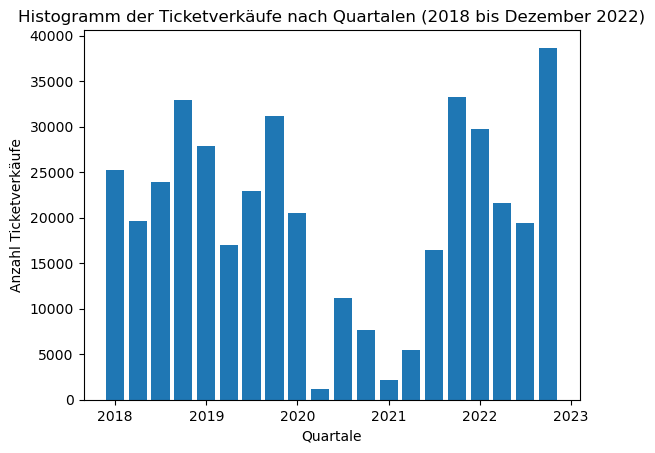

In [6]:
# Filtere den DataFrame nach Daten seit 2018
start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2023-01-01')  # Enddatum auf 2023-01-01 setzen, um das letzte Quartal 2022 einzuschließen
df_filtered = df_t_bereinigt[(df_t_bereinigt['date'] >= start_date) & (df_t_bereinigt['date'] < end_date)]

# Erstelle das Histogramm nach Quartalen
quarters = pd.PeriodIndex(df_filtered['date'], freq='Q')
bins = pd.period_range(start=quarters.min(), end=quarters.max() +1, freq='Q').to_timestamp()
plt.hist(quarters.to_timestamp(), bins=bins, align='left', rwidth=0.8)
plt.xlabel('Quartale')
plt.ylabel('Anzahl Ticketverkäufe')
plt.title('Histogramm der Ticketverkäufe nach Quartalen (2018 bis Dezember 2022)')

# Speichere den Plot als Datei
plt.savefig("C:/Users/felix.oechslein/Desktop/Analysen Thalia, Mai/Grafiken/" +
            'histogramm_Tickervkäufe_2018_2022.png')

plt.show()


#### Histogramm saisonaler Effekt

C:\Users\felix.oechslein\AppData\Local\Temp\ipykernel_17776\4136535461.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['date'].dt.month


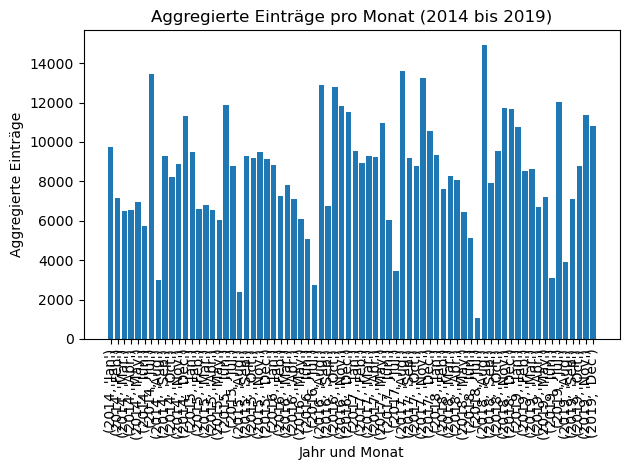

In [27]:
# Filtere den DataFrame nach den Jahren 2014 bis 2019
start_date = pd.to_datetime('2014-01-01')
end_date = pd.to_datetime('2019-12-31')
df_filtered = df_t_bereinigt[(df_t_bereinigt['date'] >= start_date) & (df_t_bereinigt['date'] <= end_date)]

# Extrahiere den Monat aus dem Datum
df_filtered['month'] = df_filtered['date'].dt.month

# Gruppiere die Einträge nach Jahr und Monat und zähle die Anzahl der Einträge
entries_by_month = df_filtered.groupby([df_filtered['date'].dt.year, df_filtered['month']])['date'].count()

# Erstelle das Histogramm
months = pd.date_range(start=start_date, end=end_date, freq='M')
x_ticks = [(month.year, month.strftime('%b')) for month in months]
plt.bar(range(len(entries_by_month)), entries_by_month)
plt.xlabel('Jahr und Monat')
plt.ylabel('Aggregierte Einträge')
plt.title('Aggregierte Einträge pro Monat (2014 bis 2019)')
plt.xticks(range(len(entries_by_month)), x_ticks, rotation='vertical')

# Zeige den Plot an
plt.tight_layout()
plt.show()

#### Histogramm der Ticketverkäufe seit 2021

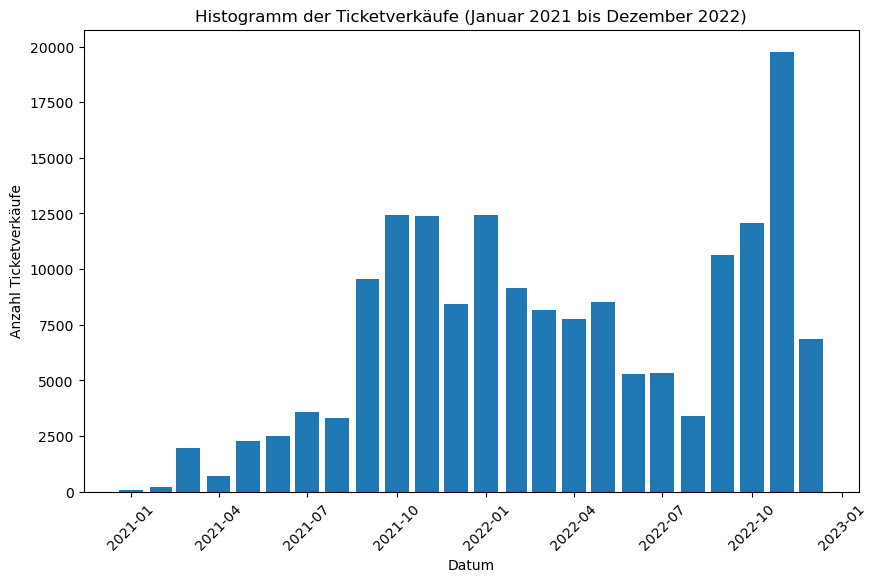

In [15]:
# Filtere den DataFrame nach Daten seit 2021
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2023-01-01')  # Enddatum auf 2023-01-01 setzen, um das letzte Quartal 2022 einzuschließen
df_filtered = df_t_bereinigt[(df_t_bereinigt['date'] >= start_date) & (df_t_bereinigt['date'] < end_date)]

# Erstelle das Histogramm nach Quartalen
# Größe des Plots anpassen
plt.figure(figsize=(10, 6))

quarters = pd.PeriodIndex(df_filtered['date'], freq='M')
bins = pd.period_range(start=quarters.min(), end=quarters.max() +1, freq='M').to_timestamp()
plt.hist(quarters.to_timestamp(), bins=bins, align='left', rwidth=0.8)
plt.xticks(rotation=45)
plt.xlabel('Datum')
plt.ylabel('Anzahl Ticketverkäufe')
plt.title('Histogramm der Ticketverkäufe (Januar 2021 bis Dezember 2022)')

# Speichere den Plot als Datei
plt.savefig("C:/Users/felix.oechslein/Desktop/Analysen Thalia, Mai/Grafiken/" +
            'histogramm_Tickervkäufe_2021_2022.png', bbox_inches='tight')

plt.show()

##### Einträge für jede iid im Zeitverlauf sortieren

In [6]:
df_t_bereinigt = df_t_bereinigt.sort_values(by=["iid", "date"])

In [7]:
df_t_bereinigt.head()

,iid,key,attrtype,status,pricetotal,date
980434,100002747,JET_1_a1145738,TI,Buchung,35.0,2022-02-03 12:44:22
980435,100002747,JET_1_a1145738,TI,Buchung,35.0,2022-02-03 12:44:22
980436,100002747,JET_1_a1145738,TI,Buchung,35.0,2022-02-03 12:44:22
1896194,100002747,JET_1_a1167566,TI,Buchung,25.0,2022-04-29 14:03:00
1896196,100002747,JET_1_a1167566,TI,Buchung,25.0,2022-04-29 14:03:00


##### Anzahl der unique Käufe 

In [8]:
df_t_bereinigt = df_t_bereinigt.loc[df_t_bereinigt.groupby(["iid", "key"])["date"].idxmin()]
df_t_bereinigt = df_t_bereinigt[["iid", "date"]]
df_t_bereinigt.head(20)

,iid,date
980434,100002747,2022-02-03 12:44:22
1896194,100002747,2022-04-29 14:03:00
835817,100009615,2018-09-10 09:52:00
835815,100009615,2018-10-22 10:32:00
896673,100009745,2021-10-29 11:52:50
896113,100009745,2021-10-29 11:55:06
941810,100009745,2021-12-16 15:36:50
1894067,100009745,2022-04-22 10:41:21
1908369,100009745,2022-05-16 15:41:14
1912092,100011333,2022-05-27 10:24:33


##### Monate als t = 1, .... abspeichern

In [9]:
# Berechnung der neuen Spalte "month_count"
df_t_bereinigt['month_count'] = (df_t_bereinigt['date'].dt.year - 2020) * 12 + df_t_bereinigt['date'].dt.month - 5
df_t_bereinigt.head()

,iid,date,month_count
980434,100002747,2022-02-03 12:44:22,21
1896194,100002747,2022-04-29 14:03:00,23
835817,100009615,2018-09-10 09:52:00,-20
835815,100009615,2018-10-22 10:32:00,-19
896673,100009745,2021-10-29 11:52:50,17


(array([3.0000e+00, 6.1200e+02, 6.9800e+02, 1.6030e+03, 3.8700e+03,
        3.8110e+03, 1.0700e+02, 3.3000e+01, 5.5000e+01, 1.6100e+02,
        1.7300e+03, 6.2900e+02, 1.3660e+03, 1.3810e+03, 2.1280e+03,
        1.7290e+03, 4.9550e+03, 5.8970e+03, 5.6780e+03, 4.0810e+03,
        6.4370e+03, 4.5780e+03, 3.9980e+03, 3.8580e+03, 3.9580e+03,
        2.7020e+03, 2.5560e+03, 1.5950e+03, 5.0670e+03, 5.6160e+03,
        1.1485e+04]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31.]),
 <BarContainer object of 31 artists>)

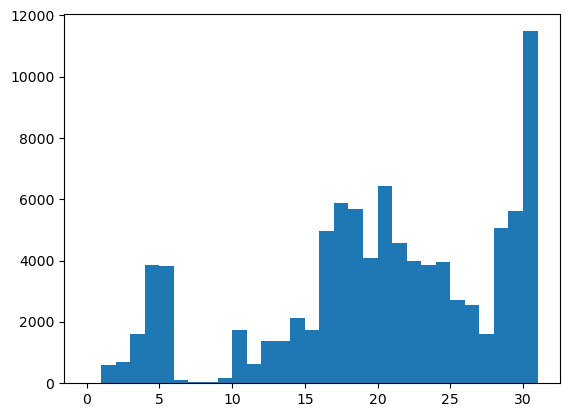

In [11]:
plt.hist(df_t_bereinigt[df_t_bereinigt['month_count'] >= 0]["month_count"], bins = 31)

In [10]:
df_t_bereinigt[df_t_bereinigt['month_count'] >= 0]["month_count"].max()

31

#### 2. verarbeiteteDaten als Elphi_transactions_ersteBereinigung.csv in dem Ordner verarbeitete_Daten abspeichern

In [12]:
path = r'C:/Users/felix.oechslein/Desktop/Analysen Thalia, Mai/verarbeitete_daten/'
filename = 'Thalia_transactions_ersteBereinigung.csv'

df_t_bereinigt.to_csv(os.path.join(path, filename), index=False)